In [241]:
import pandas as pd
import numpy as np
import math
import seaborn as sns

# load data

In [247]:
DATA_RAW_PATH = "data/data.parquet"
DATA_LABELS_PATH = "data/labels.csv"

data = pd.read_parquet(DATA_RAW_PATH)
print(data.head())
print(data.info())
#print('num of machines', len(set(data.MachineId)))
#print(set(data.MachineId))

labels = pd.read_csv(DATA_LABELS_PATH)
#print('labels cols:',labels.columns)
#print(labels['PumpFailed'].value_counts())
#print(labels['SlowStart'].value_counts())
#print(labels['SlowEnd'].value_counts())
print('-=========================-'*3)
print(labels.head())
print(labels.info())

  MachineId  MeasurementId  Pressure
0     0_0_0              0       0.0
1     0_0_0              0       0.0
2     0_0_0              0       0.0
3     0_0_0              0       0.0
4     0_0_0              0       0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18466364 entries, 0 to 18466363
Data columns (total 3 columns):
 #   Column         Dtype  
---  ------         -----  
 0   MachineId      object 
 1   MeasurementId  int64  
 2   Pressure       float64
dtypes: float64(1), int64(1), object(1)
memory usage: 422.7+ MB
None
-=========================--=========================--=========================-
  MachineId  MeasurementId PumpFailed SlowStart SlowEnd
0     0_0_0              0      False     False   False
1     0_0_1             -1        NaN       NaN     NaN
2     0_0_2              0      False     False   False
3     0_0_3              0       True     False   False
4     0_1_0             -1        NaN       NaN     NaN
<class 'pandas.core.frame.DataFrame'>

# explore data values

In [243]:
#print(labels.iloc[1].PumpFailed)
#print(type(np.nan),np.nan)
#labels.isnull().values.any()
#print(labels.iloc[1].PumpFailed == np.nan) #.PumpFailed.isnull() # == math.isnan #[labels.PumpFailed=='NaN']
print('shape\n',labels.shape)
print('PumpFail\n', labels.PumpFailed.value_counts())
print('nans: ', labels.PumpFailed.isna().sum())

print('SlowStart\n', labels.SlowStart.value_counts())
print('nans: ', labels.SlowStart.isna().sum())
print('SlowEnd\n', labels.SlowEnd.value_counts())
print('nans: ', labels.SlowEnd.isna().sum())



print('PumpFail w slow start and slow end\n', labels[(labels.SlowStart==True)&(labels.SlowEnd==True)].PumpFailed.value_counts())

SlowStart= labels[labels.SlowStart==True]
print(SlowStart.shape)
SlowEnd= labels[labels.SlowEnd==True]

shape
 (27385, 5)
PumpFail
 False    23958
True      2942
Name: PumpFailed, dtype: int64
nans:  485
SlowStart
 False    18249
True      1051
Name: SlowStart, dtype: int64
nans:  8085
SlowEnd
 False    15477
True      3823
Name: SlowEnd, dtype: int64
nans:  8085
PumpFail w slow start and slow end
 False    1
Name: PumpFailed, dtype: int64
(1051, 5)


In [ ]:
machine_0_0_0  = data[(data['MachineId'] == '0_0_0')] # & (data['Pressure'] > 0.1)]
# failed = true
machine_0_0_3  = data[(data['MachineId'] == '0_0_3')] # & (data['Pressure'] > 0.1)]
#machine_0[ machine_0.MeasurementId == 3286]
#sorted(set(machine_0_0_3.MeasurementId))

'''
machines seems not to be important in this stage as we are interested just in pump failure 
    is it independent of the machine though? @TODO:

now we will work on the "MeasurementId" level 
'''

labels_Failed (2942, 5)
labels_NotFailed (23958, 5)
   MachineId  MeasurementId PumpFailed SlowStart SlowEnd
0      0_0_0              0      False     False   False
2      0_0_2              0      False     False   False
8      1_0_0              2      False      True   False
16     2_2_0              3      False     False   False
20     1_2_0              4      False     False   False


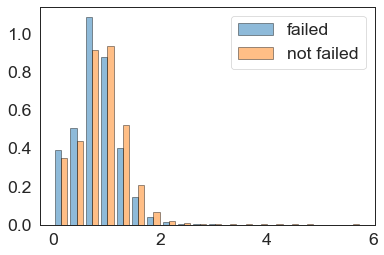

In [244]:
# lets explore pressure values which failed and which did not
limit = 100000000  # just to get an idea
labels_Failed = labels[labels.PumpFailed==True].head(limit)
labels_NotFailed = labels[labels.PumpFailed==False].head(limit)
print('labels_Failed', labels_Failed.shape)
print('labels_NotFailed', labels_NotFailed.shape)
print(labels_NotFailed.head())

fig = plt.figure()
data_failed = data[data['MeasurementId'].isin(labels_Failed.MeasurementId)]
data_notFailed = data[data['MeasurementId'].isin(labels_NotFailed .MeasurementId)]
_bins = 20
plt.hist([data_failed[data_failed.Pressure>0].Pressure,data_notFailed[data_notFailed.Pressure>0].Pressure
         ], bins=_bins, label=['failed','not failed'], \
         alpha=.5, edgecolor='black', density=1)
#plt.hist(data_notFailed.Pressure, bins=_bins, label='not failed', alpha=.5, edgecolor='black')
plt.legend()
plt.show()

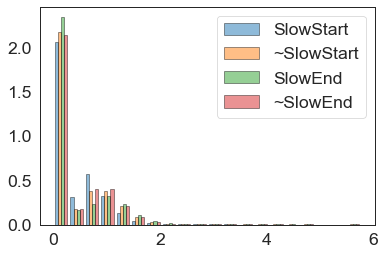

In [245]:
# now lets see SlowStart and SlowEnd 
# lets explore pressure values which failed and which did not
limit = 100000000  # just to get an idea
labels_SlowStart = labels[labels.SlowStart==True].head(limit)
labels_NotSlowStart = labels[labels.SlowStart==False].head(limit)

labels_SlowEnd = labels[labels.SlowEnd==True].head(limit)
labels_NotSlowEnd = labels[labels.SlowEnd==False].head(limit)

_data = [
            data[data['MeasurementId'].isin(labels_SlowStart.MeasurementId)].Pressure,
            data[data['MeasurementId'].isin(labels_NotSlowStart .MeasurementId)].Pressure,
            data[data['MeasurementId'].isin(labels_SlowEnd.MeasurementId)].Pressure,
            data[data['MeasurementId'].isin(labels_NotSlowEnd .MeasurementId)].Pressure
        ]

_labels = ['SlowStart', '~SlowStart', 'SlowEnd', '~SlowEnd']

fig = plt.figure()
plt.hist(_data, bins=_bins, label=_labels, \
         alpha=.5, edgecolor='black', density=1)
#plt.hist(data_notFailed.Pressure, bins=_bins, label='not failed', alpha=.5, edgecolor='black')
plt.legend()
plt.show()

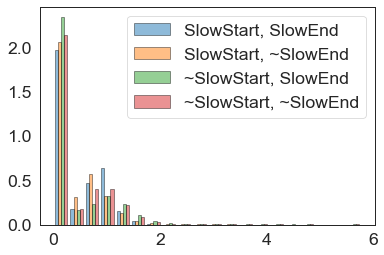

In [246]:
# now lets see SlowStart and SlowEnd 
# lets explore pressure values which failed and which did not
limit = 100000000  # just to get an idea
labels_SlowStart_SlowEnd = labels[(labels.SlowStart==True)&(labels.SlowEnd==True)].head(limit)
labels_SlowStart_NotSlowEnd = labels[(labels.SlowStart==True)&(labels.SlowEnd==False)].head(limit)

labels_NotSlowStart_SlowEnd = labels[(labels.SlowStart==False)&(labels.SlowEnd==True)].head(limit)
labels_NotSlowStart_NotSlowEnd = labels[(labels.SlowStart==False)&(labels.SlowEnd==False)].head(limit)

_data = [
            data[data['MeasurementId'].isin(labels_SlowStart_SlowEnd.MeasurementId)].Pressure,
            data[data['MeasurementId'].isin(labels_SlowStart_NotSlowEnd .MeasurementId)].Pressure,
            data[data['MeasurementId'].isin(labels_NotSlowStart_SlowEnd.MeasurementId)].Pressure,
            data[data['MeasurementId'].isin(labels_NotSlowStart_NotSlowEnd .MeasurementId)].Pressure
        ]

_labels = ['SlowStart, SlowEnd', 'SlowStart, ~SlowEnd','~SlowStart, SlowEnd', '~SlowStart, ~SlowEnd']

fig = plt.figure()
plt.hist(_data, bins=_bins, label=_labels, \
         alpha=.5, edgecolor='black', density=1)
#plt.hist(data_notFailed.Pressure, bins=_bins, label='not failed', alpha=.5, edgecolor='black')
plt.legend()
plt.show()

In [239]:
#data[data.MeasurementId == 0].shape
gdf = data[data.Pressure==0].groupby(['MachineId','MeasurementId']).size().reset_index(name='counts_p0').sort_values(['counts_p0'])
gdf.head()

array([[<AxesSubplot:title={'center':'MeasurementId'}>,
        <AxesSubplot:title={'center':'Pressure'}>]], dtype=object)

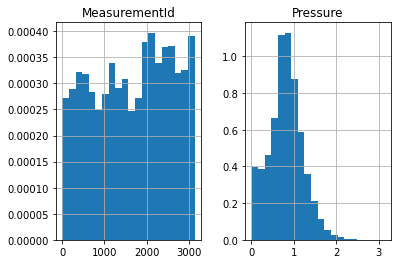

In [176]:
#.groupby(['MachineId','MeasurementId']).size().reset_index(name='counts').sort_values(['counts'])
#title='PumpFailed==True')
PumpFailed_data = data[(data['MeasurementId'].isin(labels[labels.PumpFailed==True].MeasurementId))]
PumpFailed_data[PumpFailed_data.Pressure>0].hist(bins=_bins, density=True)

array([[<AxesSubplot:title={'center':'MeasurementId'}>,
        <AxesSubplot:title={'center':'Pressure'}>]], dtype=object)

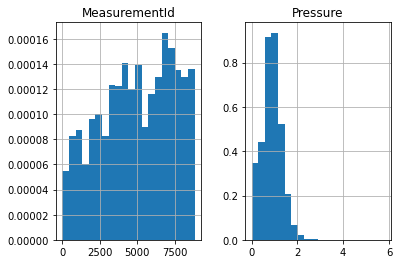

In [177]:
#title='PumpFailed==True')
PumpNotFailed_data = data[(data['MeasurementId'].isin(labels[labels.PumpFailed==False].MeasurementId))]
PumpNotFailed_data[PumpNotFailed_data.Pressure>0].hist(bins=_bins, density=True, stacked=True)

# lets try to fit it with some distribution

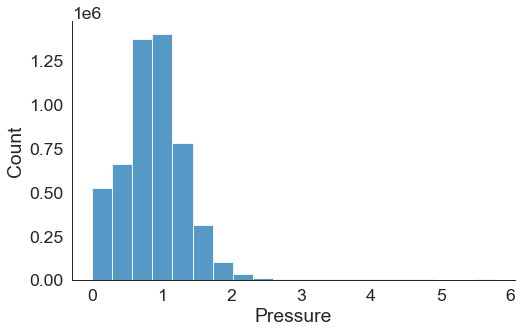

In [192]:
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

# best fit of data
#datos = PumpNotFailed_data[PumpNotFailed_data.Pressure>=0]
datos = PumpNotFailed_data[PumpNotFailed_data.Pressure>0]


sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=datos, x="Pressure", kind="hist", bins = 20, aspect = 1.5)

,sumsquare_error,aic,bic,kl_div
norm,0.251519,3780.33602,-8.738904e+07,inf


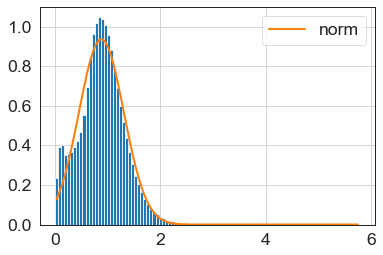

In [196]:
p = datos.Pressure.values
#_dists = ['gamma', 'lognorm', "beta", "burr", "norm"]
_dists = ["norm"]
f = Fitter(p,distributions=_dists)
f.fit()
f.summary()

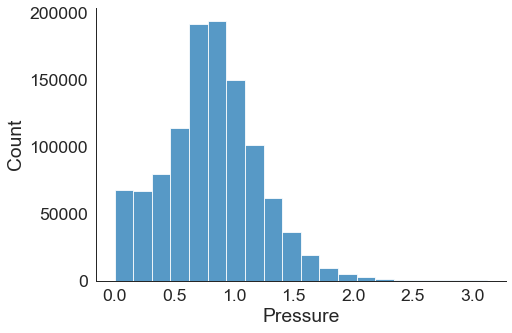

In [197]:
datos_f = PumpFailed_data[PumpFailed_data.Pressure>0]

sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=datos_f, x="Pressure", kind="hist", bins = 20, aspect = 1.5)

,sumsquare_error,aic,bic,kl_div
norm,0.720660,887.701884,-1.567517e+07,inf
gamma,0.899795,703.998178,-1.543077e+07,inf
burr,inf,inf,inf,inf
lognorm,inf,inf,inf,inf
beta,inf,inf,inf,inf


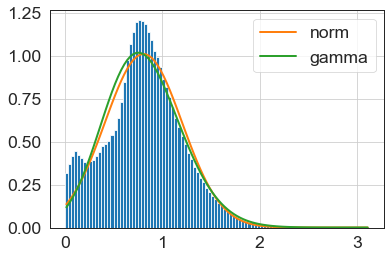

In [198]:
p_f = datos_f.Pressure.values
_dists = ['gamma', 'lognorm', "beta", "burr", "norm"]
#_dists = ["norm"]
f = Fitter(p_f,distributions=_dists)
f.fit()
f.summary()

## fitting a distribution does not seems to be a way atm

     MachineId  MeasurementId PumpFailed SlowStart SlowEnd
2175     0_0_0            905      False     False    True
2183     0_0_0            907      False     False    True
2323     0_0_0            963      False     False    True
2361     0_0_0            980      False     False    True
2382     0_0_0            988       True     False   False
2713     0_0_0           1120      False     False   False
2724     0_0_0           1125       True     False   False
2772     0_0_0           1142       True     False   False
2799     0_0_0           1152      False     False   False
2803     0_0_0           1153      False     False   False
2825     0_0_0           1162      False     False   False
2883     0_0_0           1183      False     False   False
3021     0_0_0           1237      False     False   False
3025     0_0_0           1238      False     False    True
3048     0_0_0           1248      False     False    True
3462     0_0_0           1404      False     False    Tr

"\nplt.scatter(machine_0_0_0[machine_0_0_0.].MeasurementId, machine_0_0_0.Pressure, label='not failed')\nplt.scatter(machine_0_0_3.MeasurementId, machine_0_0_3.Pressure, label='failed')\nplt.legend()\nplt.show()\n\nfig = plt.figure()\nplt.hist(machine_0_0_0[machine_0_0_0.MeasurementId == measure_id].Pressure, label='not failed', alpha=.5, edgecolor='black')\nplt.hist(machine_0_0_3[machine_0_0_3.MeasurementId == measure_id].Pressure, label='failed', alpha=.5, edgecolor='black')\nplt.legend()\nplt.show()\n"

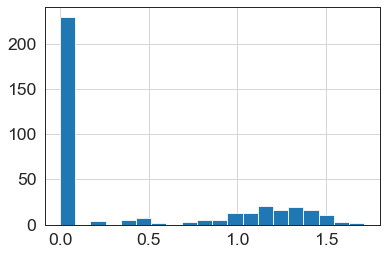

In [221]:
import matplotlib.pyplot as plt
mach_000 = labels[labels['MachineId']=='0_0_0']
print(mach_000.head(50).tail(20))
measure_id = 988
machine_id = '0_0_0'
print(labels[(labels.MeasurementId==measure_id)&(labels.MachineId==machine_id)])

fig = plt.figure()
data_failed = data[(data['MeasurementId']==measure_id)&(data['MachineId']==machine_id)]

data_failed.Pressure.hist(bins=_bins)


'''
plt.scatter(machine_0_0_0[machine_0_0_0.].MeasurementId, machine_0_0_0.Pressure, label='not failed')
plt.scatter(machine_0_0_3.MeasurementId, machine_0_0_3.Pressure, label='failed')
plt.legend()
plt.show()

fig = plt.figure()
plt.hist(machine_0_0_0[machine_0_0_0.MeasurementId == measure_id].Pressure, label='not failed', alpha=.5, edgecolor='black')
plt.hist(machine_0_0_3[machine_0_0_3.MeasurementId == measure_id].Pressure, label='failed', alpha=.5, edgecolor='black')
plt.legend()
plt.show()
'''

In [220]:
print(labels[(labels.PumpFailed==True)&(labels.SlowStart==True)&(labels.SlowEnd==False)].shape)
print(labels[(labels.PumpFailed==True)&(labels.SlowStart==False)&(labels.SlowEnd==True)].shape)
print(labels[(labels.PumpFailed==True)&(labels.SlowStart==False)&(labels.SlowEnd==False)].shape)
print(labels[(labels.PumpFailed==True)&(labels.SlowStart==True)&(labels.SlowEnd==True)].shape)
#data.columns
print(labels[(labels.PumpFailed==False)&(labels.SlowStart==True)&(labels.SlowEnd==False)].shape)
print(labels[(labels.PumpFailed==False)&(labels.SlowStart==False)&(labels.SlowEnd==True)].shape)
print(labels[(labels.PumpFailed==False)&(labels.SlowStart==False)&(labels.SlowEnd==False)].shape)
print(labels[(labels.PumpFailed==False)&(labels.SlowStart==True)&(labels.SlowEnd==True)].shape)

(0, 5)
(2, 5)
(2158, 5)
(0, 5)
(1050, 5)
(3820, 5)
(12269, 5)
(1, 5)


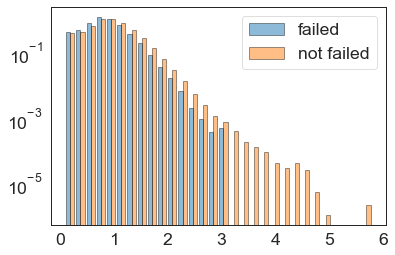

In [235]:
fig = plt.figure()

data_failed = data[data['MeasurementId'].isin(labels_Failed.MeasurementId)]
data_notFailed = data[data['MeasurementId'].isin(labels_NotFailed .MeasurementId)]
_bins = 30
plt.hist([data_failed[data_failed.Pressure>0.1].Pressure,data_notFailed[data_notFailed.Pressure>0.1].Pressure
         ], bins=_bins, label=['failed','not failed'], \
         alpha=.5, edgecolor='black', density=1)
#plt.hist(data_notFailed.Pressure, bins=_bins, label='not failed', alpha=.5, edgecolor='black')
plt.yscale('log')
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, 7, step=1))  # Set label locations.
plt.legend()
plt.show()

# lets group and join data; get some statistics and see the correlation

In [251]:
## define new cols from grouped data based on their statistics
df_grouped = data[data.Pressure>0].groupby(['MachineId','MeasurementId'], as_index=False).agg(
                                                                    p_mean = ('Pressure', np.mean),
                                                                    p_median = ('Pressure', np.median),
                                                                    p_std = ('Pressure', np.std),
                                                                    p_var = ('Pressure', np.var),
                                                                    p_sum = ('Pressure', np.sum),
                                                                    p_count = ('Pressure', pd.Series.count)
                                                                )
# 'p_mean':np.mean, 'p_meadian':np.median, 'p_std':np.std, 'p_var':np.var, 'p_sum':np.sum, 'p_count':pd.Series.count
df_grouped.head()

,MachineId,MeasurementId,p_mean,p_median,p_std,p_var,p_sum,p_count
0,0_0_0,-1,0.675184,0.677540,0.446505,0.199367,21239.926375,31458
1,0_0_0,0,1.014906,1.080583,0.349993,0.122495,138.027184,136
2,0_0_0,215,1.354823,1.467253,0.372200,0.138533,260.126100,192
3,0_0_0,237,1.319532,1.450188,0.431919,0.186554,294.255639,223
4,0_0_0,353,0.779569,0.778426,0.191767,0.036775,167.607386,215


In [252]:
dnum_p0 = data.groupby(['MachineId','MeasurementId'])['Pressure'].apply(lambda x: (x==0).sum()).reset_index(name='dnum_p0')
dnum_p1 = data.groupby(['MachineId','MeasurementId'])['Pressure'].apply(lambda x: (x>0).sum()).reset_index(name='dnum_p1')
#dnum_p_greater_mean = data.groupby(['MachineId','MeasurementId'])['Pressure'].apply(lambda x: (x>0).sum()).reset_index(name='dnum_p1')
print(dnum_p0.head())
#print(dnum_p0.count)
print(dnum_p1.head())
#print(dnum_p1.shape)

  MachineId  MeasurementId  dnum_p0
0     0_0_0             -1    70253
1     0_0_0              0      232
2     0_0_0            215      540
3     0_0_0            237      366
4     0_0_0            353      134
  MachineId  MeasurementId  dnum_p1
0     0_0_0             -1    31458
1     0_0_0              0      136
2     0_0_0            215      192
3     0_0_0            237      223
4     0_0_0            353      215


In [253]:
df_gm = df_grouped.merge(labels, on=['MachineId','MeasurementId'])
df_gm = df_gm.merge(dnum_p0, on=['MachineId','MeasurementId'])
df_gm = df_gm.merge(dnum_p1, on=['MachineId','MeasurementId'])
df_gm.dropna(subset=['PumpFailed'], inplace=True) # , axis=0, how='any'
df_gm.replace({False: 0, True: 1}, inplace=True)
df_gm.head()

,MachineId,MeasurementId,p_mean,p_median,p_std,p_var,p_sum,p_count,PumpFailed,SlowStart,SlowEnd,dnum_p0,dnum_p1
1,0_0_0,0,1.014906,1.080583,0.349993,0.122495,138.027184,136,0,0.0,0.0,232,136
2,0_0_0,215,1.354823,1.467253,0.372200,0.138533,260.126100,192,0,0.0,0.0,540,192
3,0_0_0,237,1.319532,1.450188,0.431919,0.186554,294.255639,223,0,0.0,1.0,366,223
4,0_0_0,353,0.779569,0.778426,0.191767,0.036775,167.607386,215,0,0.0,0.0,134,215
5,0_0_0,411,1.064425,1.144124,0.462432,0.213843,182.016630,171,1,0.0,0.0,202,171


In [256]:
for col in df_gm.columns:
    print(col, 'num of nans:', df_gm[col].isna().sum())
    
print(df_gm[df_gm['p_std'].isna()])
df_gm.drop(df_gm[df_gm['p_std'].isna()].index, inplace = True)
print(df_gm[df_gm['p_std'].isna()])

MachineId num of nans: 0
MeasurementId num of nans: 0
p_mean num of nans: 0
p_median num of nans: 0
p_std num of nans: 1
p_var num of nans: 1
p_sum num of nans: 0
p_count num of nans: 0
PumpFailed num of nans: 0
SlowStart num of nans: 7600
SlowEnd num of nans: 7600
dnum_p0 num of nans: 0
dnum_p1 num of nans: 0
      MachineId  MeasurementId    p_mean  p_median  p_std  p_var     p_sum  \
19489     4_1_3           6197  0.008724  0.008724    NaN    NaN  0.008724   

       p_count  PumpFailed  SlowStart  SlowEnd  dnum_p0  dnum_p1  
19489        1           0        0.0      0.0      390        1  
Empty DataFrame
Columns: [MachineId, MeasurementId, p_mean, p_median, p_std, p_var, p_sum, p_count, PumpFailed, SlowStart, SlowEnd, dnum_p0, dnum_p1]
Index: []


In [257]:
df_gm.dnum_all = df_gm.dnum_p0 + df_gm.dnum_p1
df_gm['dnum_p0p'] = df_gm.dnum_p0 / df_gm.dnum_all
df_gm['dnum_p1p'] = df_gm.dnum_p1 / df_gm.dnum_all
df_gm.head()

C:\Users\Mirek\AppData\Local\Temp/ipykernel_20976/1484955169.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_gm.dnum_all = df_gm.dnum_p0 + df_gm.dnum_p1


,MachineId,MeasurementId,p_mean,p_median,p_std,p_var,p_sum,p_count,PumpFailed,SlowStart,SlowEnd,dnum_p0,dnum_p1,dnum_p0p,dnum_p1p
1,0_0_0,0,1.014906,1.080583,0.349993,0.122495,138.027184,136,0,0.0,0.0,232,136,0.630435,0.369565
2,0_0_0,215,1.354823,1.467253,0.372200,0.138533,260.126100,192,0,0.0,0.0,540,192,0.737705,0.262295
3,0_0_0,237,1.319532,1.450188,0.431919,0.186554,294.255639,223,0,0.0,1.0,366,223,0.621392,0.378608
4,0_0_0,353,0.779569,0.778426,0.191767,0.036775,167.607386,215,0,0.0,0.0,134,215,0.383954,0.616046
5,0_0_0,411,1.064425,1.144124,0.462432,0.213843,182.016630,171,1,0.0,0.0,202,171,0.541555,0.458445


<AxesSubplot:>

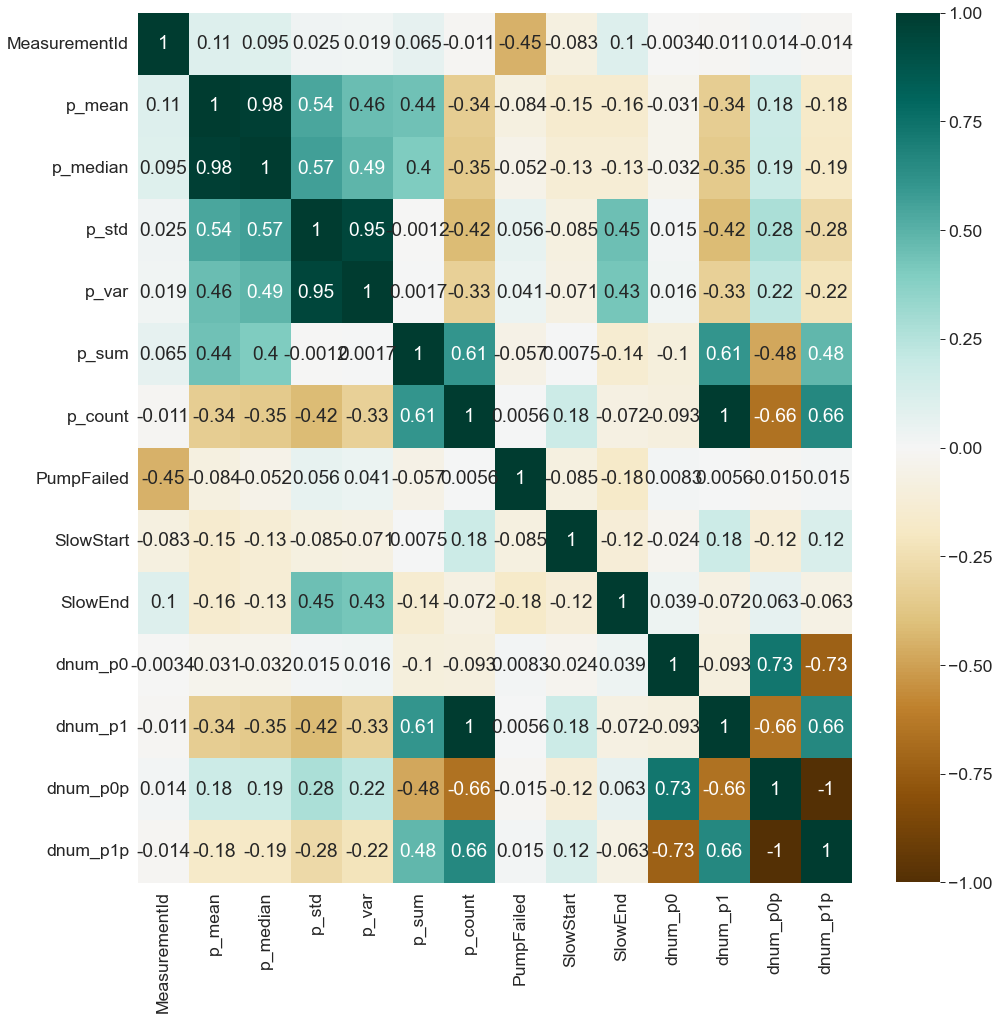

In [259]:
plt.figure(figsize=(16, 16))
sns.heatmap(df_gm.corr(method ='pearson'), vmin=-1, vmax=1, annot=True, cmap='BrBG')

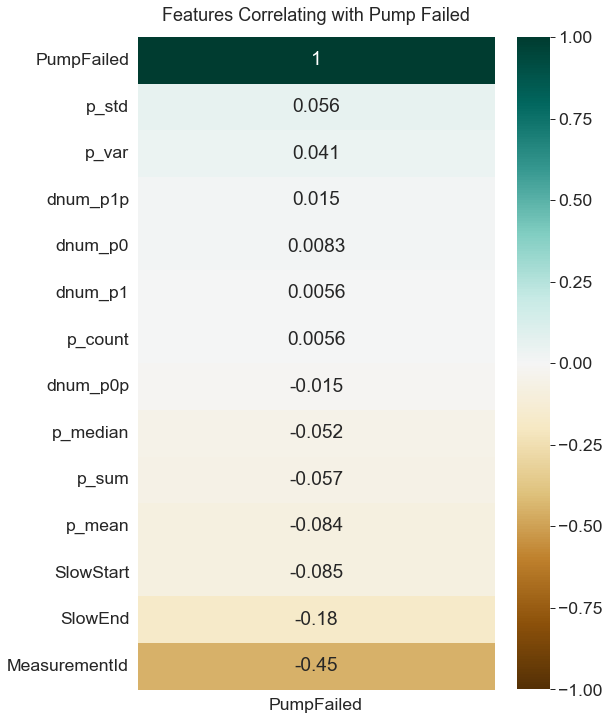

In [260]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_gm.corr(method ='pearson')[['PumpFailed']].sort_values(by='PumpFailed', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Pump Failed', fontdict={'fontsize':18}, pad=16);